## PART 1: Explore the data and different tokenization criteria.

In [1]:
# Read the text file in and store it in a variable called text
with open("gameofthrones.txt", "r") as file:
    text = file.read()

In [2]:
# Print the length of the text
print("Lenght of the book in characters: ", len(text))

Lenght of the book in characters:  5662324


In [3]:
print(text[:1000])



“We should start back,” Gared urged as the woods began to grow dark around them. “The wildlings are dead.”

“Do the dead frighten you?” Ser Waymar Royce asked with just the hint of a smile.

Gared did not rise to the bait. He was an old man, past fifty, and he had seen the lordlings come and go. “Dead is dead,” he said. “We have no business with the dead.”

“Are they dead?” Royce asked softly. “What proof have we?”

“Will saw them,” Gared said. “If he says they are dead, that’s proof enough for me.”

Will had known they would drag him into the quarrel sooner or later. He wished it had been later rather than sooner. “My mother told me that dead men sing no songs,” he put in.

“My wet nurse said the same thing, Will,” Royce replied. “Never believe anything you hear at a woman’s tit. There are things to be learned even from the dead.” His voice echoed, too loud in the twilit forest.

“We have a long ride before us,” Gared pointed out. “Eight days, maybe nine. And night is falling.”

Ser

### Let's try to explore a character based encoding

In [13]:
chars = sorted(list(set(text)))  # With this line we get all the unique characters in the text
print(repr("".join(chars)))  # And we print them 
print("Number of unique characters: ", len(chars))  # This is a vocabulary size

'\n !(),-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZ[]abcdefghijklmnopqrstuvwxyz{}éê—‘’“”…'
Number of unique characters:  86


In [14]:
# Create a mapping from characters to indices and vice versa
char_to_idx = {ch:i for i, ch in enumerate(chars)}
idx_to_char = {i:ch for i, ch in enumerate(chars)}

# Create the encode and decode functions
encode_char = lambda s: [char_to_idx[c] for c in s] # s is the input string that I want to encode
decode_char = lambda l: "".join([idx_to_char[i] for i in l]) # l is the input list of indices that I want to decode
# Create a function that shows the single tokens that compose the string after splitting it
show_single_tokens = lambda s: [c for c in s]

In [18]:
# Try to encode and decode a string
string = "This is a test!"
tokens = show_single_tokens(string)
print("Tokens: ", tokens)
encoded = encode_char(string)
print("Encoded string: ", encoded)
decoded = decode_char(encoded)
print("Decoded string: ", decoded)

Tokens:  ['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'a', ' ', 't', 'e', 's', 't', '!']
Encoded string:  [41, 57, 58, 68, 1, 58, 68, 1, 50, 1, 69, 54, 68, 69, 2]
Decoded string:  This is a test!


### Let's try to explore a word based encoding

In [19]:
import nltk  # pip install nltk
from nltk.tokenize import word_tokenize

# Get the tokenizer
#nltk.download('punkt')

words = sorted(list(set(word_tokenize(text))))  # With this line we get all the unique words in the text
print(words[:100])
print("Number of words: ", len(words))  # This is the vocabulary size

['!', '(', ')', ',', '.', '..', '0', '1-37', '103-129', '10th', '129-131', '131-157', '157-161', '15th', '161-171', '16th', '171-172', '172-184', '184-209', '209-221', '221-233', '233-259', '23rd', '259-262', '262-283', '37-42', '42-48', '48-103', '57th', '61st', ':', ';', '?', 'A', 'AAHOOOOOOO', 'AAHOOOOOOOOOOOO.', 'ACROSS', 'ADDAM', 'AEGON', 'AEMON', 'AENYS', 'AERYS', 'AETHAN', 'AIR', 'ALADALE', 'ALAN', 'ALANNYS', 'ALARIC', 'ALAYAYA', 'ALBAR', 'ALBETT', 'ALEBELLY', 'ALERIE', 'ALESANDER', 'ALESTER', 'ALESTIR', 'ALFYN', 'ALL', 'ALLA', 'ALLARD', 'ALLISER', 'ALLYRION', 'ALYCE', 'ALYN', 'ALYSANNE', 'ALYSSA', 'ALYX', 'AMAREI', 'AMBROSE', 'AMEREI', 'AMI', 'AMORY', 'AN', 'AND', 'ANDAR', 'ANDREW', 'ANDROW', 'ANDROX', 'ANNARA', 'ANTARIO', 'ANYA', 'APPENDIX', 'APPLE-EATER', 'ARCHER', 'ARE', 'ARIANNE', 'ARON', 'ARRON', 'ARRY', 'ARRYK', 'ARRYN', 'ARSTAN', 'ARTHUR', 'ARWOOD', 'ARYA', 'ARYS', 'ASSHAI', 'AXELL', 'Aaaaahoooooooooooooooooooooooooo', 'Abandoned…']
Number of words:  29049


In [20]:
# Create a mapping from characters to indices (vocabulary)
word_to_idx = {word:i for i, word in enumerate(words)}
idx_to_word = {i:word for i, word in enumerate(words)}

encode_word = lambda s: [word_to_idx[word] for word in word_tokenize(s)] # s is the input string that I want to encode
decode_word = lambda l: " ".join([idx_to_word[i] for i in l]) # l is the input list of indices that I want to decode
show_single_tokens = lambda s: word_tokenize(s)

In [23]:
# Try to encode and decode a string
string = "This is a test!"
tokens = show_single_tokens(string)
print("Tokens: ", tokens)
encoded = encode_word(string)
print("Encoded string: ", encoded)
decoded = decode_word(encoded)
print("Decoded string: ", decoded)

Tokens:  ['This', 'is', 'a', 'test', '!']
Encoded string:  [5950, 16620, 6811, 25679, 0]
Decoded string:  This is a test !


### Let's try to explore a sub word based tokenizer (the one used in chatGPT!)

In [24]:
import tiktoken

enc = tiktoken.get_encoding("cl100k_base")

encode_subword = lambda s: enc.encode(s) # s is the input string that I want to encode
decode_subword = lambda l: enc.decode(l) # l is the input list of indices that I want to decode
show_single_tokens = lambda l: [enc.decode_single_token_bytes(i) for i in l]

In [27]:
# Try to encode and decode a string
string = "This is a test!"
encoded = encode_subword(string)
print("Encoded string: ", encoded)
decoded_tokens = show_single_tokens(encoded)
print("Tokens: ", decoded_tokens)
decoded = decode_subword(encoded)
print("Decoded string: ", decoded)

Encoded string:  [2028, 374, 264, 1296, 0]
Tokens:  [b'This', b' is', b' a', b' test', b'!']
Decoded string:  This is a test!


With this kind of tokenizer (byte level BPE), we can forget about the problem of out of vocabulary words. 
For example, we can encode a chinese sentence!

In [28]:
# Try to encode and decode a string
string = "你跟我一起去吗?"
encoded = encode_subword(string)
print("Encoded string: ", encoded)
decoded_tokens = show_single_tokens(encoded)
print("Tokens: ", decoded_tokens)
decoded = decode_subword(encoded)
print("Decoded string: ", decoded)

Encoded string:  [57668, 36596, 253, 37046, 15120, 72718, 86436, 7305, 245, 30]
Tokens:  [b'\xe4\xbd\xa0', b'\xe8\xb7', b'\x9f', b'\xe6\x88\x91', b'\xe4\xb8\x80', b'\xe8\xb5\xb7', b'\xe5\x8e\xbb', b'\xe5\x90', b'\x97', b'?']
Decoded string:  你跟我一起去吗?


If you look at the tokens, you can see that are subwords at the byte level! And here is where the name comes from!

## PART 2: Train a language model on the txt file.
#### For simplicity, we will stick with a character based encoding, but feel free to try out the other encodings as well!

In [29]:
import torch 
data = torch.tensor(encode_char(text), dtype=torch.long)
print(data.shape)
print(data[:100])

torch.Size([5662324])
tensor([ 0,  0, 83, 44, 54,  1, 68, 57, 64, 70, 61, 53,  1, 68, 69, 50, 67, 69,
         1, 51, 50, 52, 60,  5, 84,  1, 28, 50, 67, 54, 53,  1, 70, 67, 56, 54,
        53,  1, 50, 68,  1, 69, 57, 54,  1, 72, 64, 64, 53, 68,  1, 51, 54, 56,
        50, 63,  1, 69, 64,  1, 56, 67, 64, 72,  1, 53, 50, 67, 60,  1, 50, 67,
        64, 70, 63, 53,  1, 69, 57, 54, 62,  7,  1, 83, 41, 57, 54,  1, 72, 58,
        61, 53, 61, 58, 63, 56, 68,  1, 50, 67])


In [30]:
# Split the dataset in training and validation
# I want to store 90% of characters for training and 10% for validation
n = int(0.9*len(text))
train_data = data[:n]
val_data = data[n:]

In [37]:
print(train_data.shape)
print(val_data.shape)

torch.Size([5096091])
torch.Size([566233])


In [32]:
import random

context_length = 8 # This is maximum number of tokens that are allowed to fit in the context. 

def get_batch(data, batch_size = 8, context_length = 8):
    # Get batch_size random indices in the data
    random_idx = random.sample(range(len(data)-context_length), batch_size)
    # Pluck the next character after each random index
    inputs = torch.zeros((batch_size, context_length), dtype=torch.long)
    targets = torch.zeros((batch_size, context_length), dtype=torch.long)
    
    for i in range(batch_size):
        inputs[i,:] = data[random_idx[i]:random_idx[i]+context_length]
        targets[i,:] = data[random_idx[i]+1:random_idx[i]+context_length+1]
    
    return inputs, targets

In [39]:
# Test the function
batch_size = 4
context_length = 8

inputs, targets = get_batch(train_data, batch_size = batch_size, context_length = context_length)
print(inputs.shape)
print(inputs)
print(targets.shape)
print(targets)

torch.Size([4, 8])
tensor([[ 1, 64, 55,  1, 69, 57, 54,  1],
        [ 1, 69, 57, 67, 54, 50, 69, 54],
        [40, 69, 64, 67, 62, 82, 68,  1],
        [ 1, 67, 58, 53, 54, 67, 68,  1]])
torch.Size([4, 8])
tensor([[64, 55,  1, 69, 57, 54,  1, 56],
        [69, 57, 67, 54, 50, 69, 54, 63],
        [69, 64, 67, 62, 82, 68,  1, 26],
        [67, 58, 53, 54, 67, 68,  1, 55]])


#### IMPORTANT 
In the cell above, notice how the targets are just the inputs shifted by one cell to the right  
So for example, in the first row, for input 1, the target is 64, then for input 64 the target is 55 and so on. 

#### Build the first simple language model: a BIGRAM language model

In [40]:
# Let's build a bigram language model 
import torch.nn as nn 
import torch.nn.functional as F

class BigramLM(nn.Module):
    def __init__(self, vocab_size):
        super(BigramLM, self).__init__()
        self.embedding_table = nn.Embedding(vocab_size, vocab_size)
    
    def forward(self, inputs):
        # Receive inputs in the form (B, L, C) (batch_soze, seq length, num classes (tokens))
        # Look into the embedding table and returns the rows corresponding to the various indices
        embeddings = self.embedding_table(inputs)  # The values are usually called embeddings 
        # Return the embeddings
        return embeddings
    
    def generate(self, inputs, max_new_tokens=10):
        # Generate next tokens given the inputs (B, L, C)
        for _ in range(max_new_tokens):                   
            # Embed the inputs
            logits = self(inputs)
            
            # Get the last logit 
            last_logits = logits[:, -1, :] # Get the probabilities of next word associated with the last element in the length dimension
            #                       ^
            #                       |
            # Remember that the bigram model has a context of 1! 
            
            # Convert the raw unnormalized logits into probabilities
            probs = F.softmax(last_logits, dim=1)
            # Get the next token by sampling from a multinomial distribution
            next_token = torch.multinomial(probs, num_samples=1)
            # Concatenate to the inputs and iterate the process
            inputs = torch.cat((inputs, next_token), dim=1)
        
        # At the end, return the inputs 
        return inputs

In [42]:
# Test the generation with an untrained model 
# Get the model
model = BigramLM(len(chars))
# We pass the 0 token (linefeed!) as initial value to spark the generation 
inputs_generate = torch.zeros((1,1), dtype=torch.long)
# Decode 100 tokens and print them
print(decode_char(model.generate(inputs_generate, max_new_tokens=100)[0].tolist()))


]/WY-S/u9w—,OzY/,bz—3R(!:r1qvxtUOOE5380féW LWA”WDQx—J5{!rPU“
h!wg1Rqs1wU;”{Bb.”U;”]L—LV[{:F-jq] [UEQ


It's pretty garbage isn't it? Let's try to train the network and generate again! 

In [46]:
# Let's train this model
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

# Hyperparameters
learning_rate = 0.01
momentum = 0.9
batch_size = 32
context_length = 8 # Is not0 really taken into consideration here because we are using a bigram model
num_iterations = 100000
device = "cpu"

# Get the model
model = BigramLM(len(chars))
# Send the model to the device
model.to(device)

# Get the optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
# Get loss function
loss_fn = CrossEntropyLoss()

loss_train = 0 
# Start training loop
for i in tqdm(range(num_iterations)):
    # Get a batch
    inputs, targets = get_batch(train_data, batch_size=batch_size, context_length=context_length)
    # Send the inputs and targets to device
    inputs = inputs.to(device)
    targets = targets.to(device)
    # Get the predictions
    predictions = model(inputs)
    # We have to reshape the predictions and the targets to use cross entropy 
    B, L, C = predictions.shape
    predictions = predictions.view(B*L, C)
    targets = targets.view(B*L)
    # Compute the loss
    loss = loss_fn(predictions, targets)
    # Accumulate the loss
    loss_train += loss.item()
    # Zero the gradients
    optimizer.zero_grad()
    # Compute the gradients
    loss.backward()
    # Update the parameters
    optimizer.step()

    if (i%1000)==0 and i!=0:
        print("Training loss: ", loss_train/1000)
        loss_train = 0
        # Calculate validation loss
        val_loss = 0
        with torch.no_grad():
            model.eval()
            for _ in range(100):
                # Get a batch
                inputs, targets = get_batch(val_data, batch_size=batch_size, context_length=context_length)
                # Send the inputs and targets to device
                inputs = inputs.to(device)
                targets = targets.to(device)
                # Get the predictions
                predictions = model(inputs)
                # We have to reshape the predictions and the targets to use cross entropy 
                B, L, C = predictions.shape
                predictions = predictions.view(B*L, C)
                targets = targets.view(B*L)
                # Compute the loss
                loss = loss_fn(predictions, targets)
                val_loss += loss.item()
            model.train()
        print("Validation loss: ", val_loss/100)

  1%|          | 1001/100000 [00:02<04:11, 393.53it/s]

Training loss:  4.592946263790131
Validation loss:  4.280049834251404


  2%|▏         | 1980/100000 [00:04<03:54, 418.26it/s]

Training loss:  4.020009274244308
Validation loss:  3.8651633739471434


  3%|▎         | 3021/100000 [00:06<04:26, 363.58it/s]

Training loss:  3.6904593636989595
Validation loss:  3.607991123199463


  4%|▍         | 4015/100000 [00:08<04:24, 363.04it/s]

Training loss:  3.484175556898117
Validation loss:  3.4525987887382508


  5%|▍         | 4992/100000 [00:10<03:08, 505.25it/s]

Training loss:  3.334287985801697


  5%|▌         | 5092/100000 [00:10<04:23, 360.38it/s]

Validation loss:  3.3363973665237427


  6%|▌         | 6000/100000 [00:12<03:37, 431.35it/s]

Training loss:  3.229393401145935
Validation loss:  3.222495458126068


  7%|▋         | 6972/100000 [00:15<03:19, 467.29it/s]

Training loss:  3.1418160831928255
Validation loss:  3.152263379096985


  8%|▊         | 7978/100000 [00:17<03:21, 455.76it/s]

Training loss:  3.073363969326019
Validation loss:  3.0988198280334474


  9%|▉         | 8991/100000 [00:20<03:15, 464.67it/s]

Training loss:  3.017558865785599
Validation loss:  3.0520011472702024


 10%|█         | 10014/100000 [00:22<04:45, 314.76it/s]

Training loss:  2.9650253553390504
Validation loss:  3.0054104948043823


 11%|█         | 11001/100000 [00:24<04:39, 318.68it/s]

Training loss:  2.9252764251232146
Validation loss:  2.9941128945350646


 12%|█▏        | 12006/100000 [00:27<05:04, 289.43it/s]

Training loss:  2.8892529590129854
Validation loss:  2.9511001181602476


 13%|█▎        | 12998/100000 [00:29<03:00, 483.15it/s]

Training loss:  2.857977587223053
Validation loss:  2.8867341589927675


 14%|█▍        | 13998/100000 [00:31<03:12, 446.62it/s]

Training loss:  2.825413502216339
Validation loss:  2.88828174829483


 15%|█▍        | 14975/100000 [00:33<02:54, 486.11it/s]

Training loss:  2.811286171913147
Validation loss:  2.830368647575378


 16%|█▌        | 15983/100000 [00:36<03:21, 417.74it/s]

Training loss:  2.7779361612796785
Validation loss:  2.822484951019287


 17%|█▋        | 17020/100000 [00:39<04:25, 312.07it/s]

Training loss:  2.7621043558120726
Validation loss:  2.8130213022232056


 18%|█▊        | 18001/100000 [00:41<05:58, 228.52it/s]

Training loss:  2.741271282911301
Validation loss:  2.7842172265052794


 19%|█▉        | 19001/100000 [00:44<04:28, 301.54it/s]

Training loss:  2.7264259307384493
Validation loss:  2.7918516039848327


 20%|█▉        | 19987/100000 [00:46<03:17, 404.84it/s]

Training loss:  2.7094388990402223
Validation loss:  2.7807203221321104


 21%|██        | 20980/100000 [00:48<02:35, 508.54it/s]

Training loss:  2.6939210724830627
Validation loss:  2.73634521484375


 22%|██▏       | 21955/100000 [00:51<02:37, 495.85it/s]

Training loss:  2.6873365521430967


 22%|██▏       | 22104/100000 [00:51<03:25, 379.11it/s]

Validation loss:  2.717129054069519


 23%|██▎       | 23001/100000 [00:53<04:02, 318.04it/s]

Training loss:  2.6736574227809906
Validation loss:  2.7413174319267273


 24%|██▍       | 23996/100000 [00:55<02:37, 481.69it/s]

Training loss:  2.660153195142746
Validation loss:  2.7349358367919923


 25%|██▍       | 24993/100000 [00:58<02:29, 500.13it/s]

Training loss:  2.656420909166336
Validation loss:  2.715297985076904


 26%|██▌       | 25985/100000 [01:00<02:31, 487.06it/s]

Training loss:  2.6470064029693603
Validation loss:  2.682262144088745


 27%|██▋       | 26996/100000 [01:02<02:27, 495.40it/s]

Training loss:  2.6371020309925077
Validation loss:  2.698365454673767


 28%|██▊       | 28013/100000 [01:04<03:37, 330.37it/s]

Training loss:  2.624731294155121
Validation loss:  2.6734422707557677


 29%|██▉       | 28997/100000 [01:06<02:21, 500.90it/s]

Training loss:  2.616229248046875
Validation loss:  2.683569633960724


 30%|███       | 30018/100000 [01:09<03:12, 363.23it/s]

Training loss:  2.6142794015407564
Validation loss:  2.676214737892151


 31%|███       | 31001/100000 [01:11<03:30, 327.88it/s]

Training loss:  2.6020449986457823
Validation loss:  2.6533324933052063


 32%|███▏      | 31974/100000 [01:13<02:08, 529.40it/s]

Training loss:  2.5970312161445617
Validation loss:  2.6687306642532347


 33%|███▎      | 32988/100000 [01:15<02:25, 461.74it/s]

Training loss:  2.600049178123474
Validation loss:  2.6454636597633363


 34%|███▍      | 33984/100000 [01:17<02:13, 493.49it/s]

Training loss:  2.5915573177337645
Validation loss:  2.678830268383026


 35%|███▌      | 35013/100000 [01:20<03:28, 311.91it/s]

Training loss:  2.5859416353702547
Validation loss:  2.660281572341919


 36%|███▌      | 36008/100000 [01:22<02:59, 357.40it/s]

Training loss:  2.5783010277748106
Validation loss:  2.6435380387306213


 37%|███▋      | 37009/100000 [01:24<03:12, 327.82it/s]

Training loss:  2.5744944734573365
Validation loss:  2.6435372471809386


 38%|███▊      | 37998/100000 [01:26<02:11, 472.17it/s]

Training loss:  2.570762707710266
Validation loss:  2.613246202468872


 39%|███▉      | 38979/100000 [01:29<02:05, 486.39it/s]

Training loss:  2.5709205243587494
Validation loss:  2.6070586490631102


 40%|████      | 40010/100000 [01:31<03:03, 326.09it/s]

Training loss:  2.567404705762863
Validation loss:  2.635691215991974


 41%|████      | 41014/100000 [01:33<02:55, 335.67it/s]

Training loss:  2.5590756075382233
Validation loss:  2.626408619880676


 42%|████▏     | 41981/100000 [01:35<01:59, 486.92it/s]

Training loss:  2.5536548619270323
Validation loss:  2.6265045499801634


 43%|████▎     | 43011/100000 [01:38<02:42, 350.08it/s]

Training loss:  2.552242666244507
Validation loss:  2.606144711971283


 44%|████▍     | 44002/100000 [01:40<02:41, 347.26it/s]

Training loss:  2.5539704401493073
Validation loss:  2.599542324542999


 45%|████▌     | 45012/100000 [01:42<02:52, 318.30it/s]

Training loss:  2.5397312939167023
Validation loss:  2.6120343470573424


 46%|████▌     | 45993/100000 [01:44<01:36, 558.13it/s]

Training loss:  2.5405377984046935
Validation loss:  2.5970427775382996


 47%|████▋     | 47010/100000 [01:46<02:36, 339.50it/s]

Training loss:  2.541015656709671
Validation loss:  2.6078411746025085


 48%|████▊     | 48003/100000 [01:48<02:04, 417.28it/s]

Training loss:  2.538312720298767
Validation loss:  2.606550033092499


 49%|████▉     | 48996/100000 [01:50<01:27, 582.33it/s]

Training loss:  2.534052898645401
Validation loss:  2.5950533843040464


 50%|█████     | 50006/100000 [01:52<02:14, 371.95it/s]

Training loss:  2.536273650407791
Validation loss:  2.5959151005744934


 51%|█████     | 50995/100000 [01:54<01:32, 530.86it/s]

Training loss:  2.5306568818092345
Validation loss:  2.598369228839874


 52%|█████▏    | 52021/100000 [01:57<02:10, 367.17it/s]

Training loss:  2.527211102247238
Validation loss:  2.598992123603821


 53%|█████▎    | 52973/100000 [01:58<01:42, 457.60it/s]

Training loss:  2.5246294231414796


 53%|█████▎    | 53064/100000 [01:59<02:27, 318.05it/s]

Validation loss:  2.583560311794281


 54%|█████▍    | 53992/100000 [02:01<01:24, 543.94it/s]

Training loss:  2.5155400285720826
Validation loss:  2.5971500372886656


 55%|█████▌    | 55041/100000 [02:03<01:53, 394.42it/s]

Training loss:  2.523045637369156
Validation loss:  2.589197723865509


 56%|█████▌    | 55983/100000 [02:05<01:17, 567.57it/s]

Training loss:  2.5157989995479584
Validation loss:  2.587491931915283


 57%|█████▋    | 57013/100000 [02:07<01:53, 377.40it/s]

Training loss:  2.5239043900966642
Validation loss:  2.598730900287628


 58%|█████▊    | 58013/100000 [02:09<01:46, 395.62it/s]

Training loss:  2.519953788757324
Validation loss:  2.5971333980560303


 59%|█████▉    | 59030/100000 [02:11<01:48, 377.23it/s]

Training loss:  2.5130090219974517
Validation loss:  2.5906390237808226


 60%|██████    | 60019/100000 [02:13<01:38, 404.28it/s]

Training loss:  2.5099689004421233
Validation loss:  2.56381165266037


 61%|██████    | 61017/100000 [02:15<01:35, 409.76it/s]

Training loss:  2.5009374840259553
Validation loss:  2.5780719113349915


 62%|██████▏   | 61993/100000 [02:17<01:12, 525.40it/s]

Training loss:  2.5036377425193788
Validation loss:  2.577374095916748


 63%|██████▎   | 63009/100000 [02:19<01:37, 378.83it/s]

Training loss:  2.503491201400757
Validation loss:  2.5669594597816467


 64%|██████▍   | 64023/100000 [02:21<01:34, 381.52it/s]

Training loss:  2.5048624565601347
Validation loss:  2.5544998812675477


 65%|██████▌   | 65037/100000 [02:23<01:32, 377.00it/s]

Training loss:  2.4994108114242555
Validation loss:  2.5778244018554686


 66%|██████▌   | 66019/100000 [02:25<01:35, 354.77it/s]

Training loss:  2.5028933863639833
Validation loss:  2.5599066376686097


 67%|██████▋   | 67030/100000 [02:27<01:26, 382.05it/s]

Training loss:  2.5037330391407013
Validation loss:  2.5648079442977907


 68%|██████▊   | 67998/100000 [02:29<00:59, 535.81it/s]

Training loss:  2.494842365026474
Validation loss:  2.578568906784058


 69%|██████▉   | 68995/100000 [02:31<00:56, 545.58it/s]

Training loss:  2.4934205777645113
Validation loss:  2.5644939756393432


 70%|███████   | 70032/100000 [02:33<01:16, 393.91it/s]

Training loss:  2.488072103738785
Validation loss:  2.5727649188041686


 71%|███████   | 71005/100000 [02:36<01:22, 350.57it/s]

Training loss:  2.4956699435710905
Validation loss:  2.55870689868927


 72%|███████▏  | 72011/100000 [02:37<01:11, 392.30it/s]

Training loss:  2.492571100473404
Validation loss:  2.562832272052765


 73%|███████▎  | 72996/100000 [02:39<00:51, 520.26it/s]

Training loss:  2.490225345849991
Validation loss:  2.5541817212104796


 74%|███████▍  | 74018/100000 [02:42<01:09, 374.88it/s]

Training loss:  2.490668550491333
Validation loss:  2.5724215960502623


 75%|███████▍  | 74996/100000 [02:44<00:44, 559.23it/s]

Training loss:  2.4859393236637115
Validation loss:  2.5574399757385256


 76%|███████▌  | 76025/100000 [02:46<01:08, 348.22it/s]

Training loss:  2.486544045686722
Validation loss:  2.541329047679901


 77%|███████▋  | 76994/100000 [02:48<00:43, 527.72it/s]

Training loss:  2.4826947407722475
Validation loss:  2.5465647387504577


 78%|███████▊  | 78024/100000 [02:50<00:56, 388.92it/s]

Training loss:  2.4863112168312074
Validation loss:  2.5376633501052854


 79%|███████▉  | 78991/100000 [02:52<00:40, 521.40it/s]

Training loss:  2.4825108604431154
Validation loss:  2.562997326850891


 80%|███████▉  | 79958/100000 [02:54<00:37, 540.00it/s]

Training loss:  2.4820168361663817
Validation loss:  2.537394323348999


 81%|████████  | 80966/100000 [02:56<00:36, 527.82it/s]

Training loss:  2.4791406664848328
Validation loss:  2.5491228985786436


 82%|████████▏ | 81989/100000 [02:58<00:33, 542.62it/s]

Training loss:  2.4796371421813963
Validation loss:  2.5607653713226317


 83%|████████▎ | 83013/100000 [03:01<00:45, 374.68it/s]

Training loss:  2.475950539827347
Validation loss:  2.5403172612190246


 84%|████████▍ | 83991/100000 [03:03<00:28, 557.31it/s]

Training loss:  2.4714354107379912
Validation loss:  2.5387964630126953


 85%|████████▌ | 85018/100000 [03:04<00:35, 426.86it/s]

Training loss:  2.477046118736267
Validation loss:  2.5380447769165038


 86%|████████▌ | 85993/100000 [03:06<00:28, 499.41it/s]

Training loss:  2.4781764912605286
Validation loss:  2.5421997356414794


 87%|████████▋ | 86984/100000 [03:08<00:23, 550.54it/s]

Training loss:  2.4722773566246032
Validation loss:  2.5426020312309263


 88%|████████▊ | 88032/100000 [03:11<00:29, 406.07it/s]

Training loss:  2.478637717485428
Validation loss:  2.546594421863556


 89%|████████▉ | 89002/100000 [03:12<00:28, 384.65it/s]

Training loss:  2.4719055252075197
Validation loss:  2.5398967599868776


 90%|█████████ | 90024/100000 [03:15<00:25, 385.64it/s]

Training loss:  2.471084065914154
Validation loss:  2.543501422405243


 91%|█████████ | 91032/100000 [03:17<00:26, 343.61it/s]

Training loss:  2.471087026596069
Validation loss:  2.5194847416877746


 92%|█████████▏| 92018/100000 [03:19<00:20, 395.76it/s]

Training loss:  2.469926010608673
Validation loss:  2.547059569358826


 93%|█████████▎| 93005/100000 [03:21<00:17, 390.11it/s]

Training loss:  2.4767605984210967
Validation loss:  2.5424549317359926


 94%|█████████▍| 94023/100000 [03:23<00:16, 356.96it/s]

Training loss:  2.472954426527023
Validation loss:  2.537514669895172


 95%|█████████▍| 94981/100000 [03:25<00:10, 484.77it/s]

Training loss:  2.463573446273804
Validation loss:  2.527319347858429


 96%|█████████▌| 96011/100000 [03:27<00:10, 384.34it/s]

Training loss:  2.469595890760422
Validation loss:  2.520380198955536


 97%|█████████▋| 97019/100000 [03:29<00:08, 370.24it/s]

Training loss:  2.468796669960022
Validation loss:  2.5386279106140135


 98%|█████████▊| 97985/100000 [03:31<00:04, 497.71it/s]

Training loss:  2.4687536549568176
Validation loss:  2.5292020535469053


 99%|█████████▉| 99025/100000 [03:34<00:02, 382.51it/s]

Training loss:  2.46521307849884
Validation loss:  2.525889105796814


100%|██████████| 100000/100000 [03:36<00:00, 462.71it/s]


In [55]:
# Let's try to generate
inputs_generate = torch.zeros((1,1), dtype=torch.long, device=device)
print(decode_char(model.generate(inputs_generate, max_new_tokens=100)[0].tolist()))


It thaitndol’se be Shed be tows, the we che buns, Jond ase, ay ack C-as. “The fthann tabe isanedit h


Still not amazing text, but we can see that it learned some correlation, like that the whitespace character is present a lot more than before, or that after the linefeed it is most probable to have the character " (have a look at the book!).  
Unfortunately, just focusing on a single character in the context to predict the next will not lead to a very good model that is able to generate coherent text.  
Let's try to improve it by using a more complex model: a recurrent neural network!

#### Build the second language model: an RNN language model

In [57]:
# Let's try with an RNN
import torch.nn as nn
import torch.nn.functional as F

class RNNLM(nn.Module):
    def __init__(self, vocab_size, hidden_size=32):
        super(RNNLM, self).__init__()
        # The same embedding table as before, in this case it is used to convert each index into a vector of size hidden_size
        # It works basically the same as above: an index is fed, and the embedding look into the matrix and returns the corresponding row
        self.embedding_table = nn.Embedding(vocab_size, hidden_size)
        # An RNN that takes as input the embeddings and returns the hidden states at each step 
        # For example for an input of size (B, L, C) the output will be (B, L, H) where H is the hidden size
        self.rnn = nn.RNN(hidden_size, hidden_size, batch_first=True)
        # Classifier to predict the next token, it takes as input the hidden state and returns a vector of size vocab_size
        self.linear = nn.Linear(hidden_size, vocab_size)
    
    def forward(self, inputs):
        # Embed the inputs
        embeddings = self.embedding_table(inputs)
        # Propagate the input embeddings through the RNN
        outputs, _ = self.rnn(embeddings)
        # Propagate the outputs through the classifier
        logits = self.linear(outputs)
        # Return the logits (unnormalized probabilities)
        return logits

    def generate(self, inputs, max_new_tokens=10):
        # Generate next tokens given the inputs (B, L, C)
        for _ in range(max_new_tokens):
            # Embed the inputs
            embeddings = self.embedding_table(inputs)
            # Feed the RNN with the embeddings (B, L, H)
            _, hidden = self.rnn(embeddings)
            #    ^
            #    |  
            # Hidden contains only the hidden state of the last iteration in the sequence
            # Remember that hidden in the RNN is in the form (N, B, H) where N is the number of layers (1 in our case)
            
            # Remove the first dimension (N) from hidden
            hidden = hidden.squeeze(0) 
            # Project to the output classes
            logits = self.linear(hidden)
            # Convert to probabilities
            probs = F.softmax(logits, dim=1)
            # Get the next token
            next_token = torch.multinomial(probs, num_samples=1)
            # Concatenate to input
            inputs = torch.cat((inputs, next_token), dim=1)
        
        # Return the generated data
        return inputs

In [59]:
# Test the generation with an untrained model 
# Get the model
model = RNNLM(len(chars), hidden_size=32)
# We pass the 0 token (linefeed!) as initial value to spark the generation 
inputs_generate = torch.zeros((1,1), dtype=torch.long)
# Decode 100 tokens and print them
print(decode_char(model.generate(inputs_generate, max_new_tokens=100)[0].tolist()))


CG“L”FS FeH‘cqomnd5GMVém”QmM!30……sM7Yf)2XqXZGgo5?oCpOM
6HC(fyevWrGm.?r}!R9.v”qF]P’ê‘JFWEN2ZMs:{ykWi(


Garbage! Let's train the model!

In [60]:
# Let's train this model
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

# Hyperparameters
learning_rate = 0.01
momentum = 0.9
batch_size = 8
context_length = 8 # We use 8 past tokens to predict the next one
num_iterations = 100000
device = "cpu"

# NEW HYPERPARAMETER FOR RNN
hidden_size = 32

# Get the model
model = RNNLM(len(chars), hidden_size=hidden_size)
# Send the model to the device
model.to(device)

# Get the optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
# Get loss function
loss_fn = CrossEntropyLoss()

loss_train = 0 
# Start training loop
for i in tqdm(range(num_iterations)):
    # Get a batch
    inputs, targets = get_batch(train_data, batch_size=batch_size, context_length=context_length)
    # Send the inputs and targets to device
    inputs = inputs.to(device)
    targets = targets.to(device)
    # Get the predictions
    predictions = model(inputs)
    # We have to reshape the predictions and the targets to use cross entropy 
    B, L, C = predictions.shape
    predictions = predictions.view(B*L, C)
    targets = targets.view(B*L)
    # Compute the loss
    loss = loss_fn(predictions, targets)
    # Accumulate the loss
    loss_train += loss.item()
    # Zero the gradients
    optimizer.zero_grad()
    # Compute the gradients
    loss.backward()
    # Update the parameters
    optimizer.step()

    if (i%1000)==0 and i!=0:
        print("Training loss: ", loss_train/1000)
        loss_train = 0
        # Calculate validation loss
        val_loss = 0
        with torch.no_grad():
            model.eval()
            for _ in range(100):
                # Get a batch
                inputs, targets = get_batch(val_data, batch_size=batch_size, context_length=context_length)
                # Send the inputs and targets to device
                inputs = inputs.to(device)
                targets = targets.to(device)
                # Get the predictions
                predictions = model(inputs)
                # We have to reshape the predictions and the targets to use cross entropy 
                B, L, C = predictions.shape
                predictions = predictions.view(B*L, C)
                targets = targets.view(B*L)
                # Compute the loss
                loss = loss_fn(predictions, targets)
                val_loss += loss.item()
            model.train()
        print("Validation loss: ", val_loss/100)

  1%|          | 1039/100000 [00:02<03:40, 447.96it/s]

Training loss:  2.65671859896183
Validation loss:  2.463285562992096


  2%|▏         | 2026/100000 [00:04<03:41, 441.47it/s]

Training loss:  2.3136475685834883
Validation loss:  2.3715449261665342


  3%|▎         | 3050/100000 [00:06<04:22, 368.91it/s]

Training loss:  2.23160593020916
Validation loss:  2.3498383462429047


  4%|▍         | 4064/100000 [00:08<03:30, 456.76it/s]

Training loss:  2.199258765697479
Validation loss:  2.295052109956741


  5%|▌         | 5019/100000 [00:10<03:30, 450.65it/s]

Training loss:  2.168326815009117
Validation loss:  2.2792186343669893


  6%|▌         | 6021/100000 [00:12<03:39, 427.47it/s]

Training loss:  2.146832978963852
Validation loss:  2.20499338388443


  7%|▋         | 7052/100000 [00:14<03:46, 409.48it/s]

Training loss:  2.1285723378658297
Validation loss:  2.297513161897659


  8%|▊         | 8034/100000 [00:16<03:32, 432.26it/s]

Training loss:  2.1082849032878874
Validation loss:  2.2170372259616853


  9%|▉         | 9054/100000 [00:18<03:14, 467.29it/s]

Training loss:  2.0931006133556367
Validation loss:  2.2297215390205385


 10%|█         | 10050/100000 [00:20<03:21, 446.62it/s]

Training loss:  2.0996092907190325
Validation loss:  2.187099437713623


 11%|█         | 11040/100000 [00:22<03:16, 451.98it/s]

Training loss:  2.1010380716323853
Validation loss:  2.1705485928058623


 12%|█▏        | 12048/100000 [00:24<03:15, 448.90it/s]

Training loss:  2.0836171852350236
Validation loss:  2.1564085030555726


 13%|█▎        | 13057/100000 [00:26<03:06, 466.06it/s]

Training loss:  2.08056372153759
Validation loss:  2.214112020730972


 14%|█▍        | 14045/100000 [00:28<03:30, 408.97it/s]

Training loss:  2.0785359793901446
Validation loss:  2.1865841126441956


 15%|█▍        | 14981/100000 [00:30<07:20, 192.82it/s]

Training loss:  2.069098296403885
Validation loss:  2.15940678358078


 16%|█▌        | 15987/100000 [00:36<07:01, 199.40it/s]

Training loss:  2.066290155529976
Validation loss:  2.123188292980194


 17%|█▋        | 16996/100000 [00:42<06:42, 206.34it/s]

Training loss:  2.069777550339699
Validation loss:  2.141996046304703


 18%|█▊        | 17995/100000 [00:47<06:37, 206.34it/s]

Training loss:  2.056837901830673
Validation loss:  2.1499832320213317


 19%|█▉        | 18993/100000 [00:52<08:18, 162.42it/s]

Training loss:  2.053383403778076
Validation loss:  2.1329954993724822


 20%|█▉        | 19996/100000 [00:58<06:35, 202.37it/s]

Training loss:  2.0516799988746643
Validation loss:  2.1258838737010954


 21%|██        | 20991/100000 [01:03<07:51, 167.56it/s]

Training loss:  2.047167855978012
Validation loss:  2.1358144700527193


 22%|██▏       | 21996/100000 [01:09<06:05, 213.57it/s]

Training loss:  2.0450169531106948
Validation loss:  2.1788332533836363


 23%|██▎       | 22989/100000 [01:14<07:21, 174.55it/s]

Training loss:  2.046187592983246
Validation loss:  2.1186340379714967


 24%|██▍       | 23986/100000 [01:19<06:15, 202.38it/s]

Training loss:  2.0534541605710985
Validation loss:  2.1494485509395598


 25%|██▌       | 25001/100000 [01:25<09:17, 134.56it/s]

Training loss:  2.0442485065460203
Validation loss:  2.0990358781814575


 26%|██▌       | 25994/100000 [01:30<06:34, 187.59it/s]

Training loss:  2.042701180696487
Validation loss:  2.1211574721336364


 27%|██▋       | 26989/100000 [01:35<05:43, 212.78it/s]

Training loss:  2.0339130910634995
Validation loss:  2.160427130460739


 28%|██▊       | 27991/100000 [01:40<06:19, 189.67it/s]

Training loss:  2.042215519428253
Validation loss:  2.1348599195480347


 29%|██▉       | 29002/100000 [01:47<09:30, 124.45it/s]

Training loss:  2.0264701739549635
Validation loss:  2.11115581035614


 30%|██▉       | 29995/100000 [01:52<06:08, 189.95it/s]

Training loss:  2.0417547628879547
Validation loss:  2.0957981288433074


 31%|███       | 30984/100000 [01:57<05:18, 216.46it/s]

Training loss:  2.032289557933807
Validation loss:  2.1013189721107484


 32%|███▏      | 32033/100000 [02:01<03:29, 323.95it/s]

Training loss:  2.0260551468133925
Validation loss:  2.0594231510162353


 33%|███▎      | 32993/100000 [02:06<05:20, 208.81it/s]

Training loss:  2.026581941366196
Validation loss:  2.121984654664993


 34%|███▍      | 33986/100000 [02:11<05:26, 202.40it/s]

Training loss:  2.0363464480638505
Validation loss:  2.089292508363724


 35%|███▌      | 35000/100000 [02:16<05:10, 209.40it/s]

Training loss:  2.028374643325806
Validation loss:  2.1080893433094023


 36%|███▌      | 35997/100000 [02:21<05:00, 212.81it/s]

Training loss:  2.0290662838220594
Validation loss:  2.0674027800559998


 37%|███▋      | 36985/100000 [02:26<04:57, 211.76it/s]

Training loss:  2.0322438216209413
Validation loss:  2.062476680278778


 38%|███▊      | 37999/100000 [02:31<04:57, 208.31it/s]

Training loss:  2.0317077919244766
Validation loss:  2.1018678903579713


 39%|███▉      | 39005/100000 [02:37<07:34, 134.32it/s]

Training loss:  2.0269194779396056
Validation loss:  2.0915488564968108


 40%|███▉      | 39994/100000 [02:42<05:13, 191.50it/s]

Training loss:  2.017469711780548
Validation loss:  2.0972886908054353


 41%|████      | 40995/100000 [02:48<05:29, 179.06it/s]

Training loss:  2.018993046045303


 41%|████      | 41028/100000 [02:48<08:36, 114.26it/s]

Validation loss:  2.12176051735878


 42%|████▏     | 42002/100000 [02:54<08:06, 119.20it/s]

Training loss:  2.0175507229566576
Validation loss:  2.0957153022289274


 43%|████▎     | 42994/100000 [02:59<05:12, 182.60it/s]

Training loss:  2.0147126368284227
Validation loss:  2.126509792804718


 44%|████▍     | 44000/100000 [03:05<04:49, 193.51it/s]

Training loss:  2.016786274313927
Validation loss:  2.098164510726929


 45%|████▍     | 44993/100000 [03:10<04:33, 201.46it/s]

Training loss:  2.0248521856069566
Validation loss:  2.1324362003803254


 46%|████▌     | 45993/100000 [03:15<04:34, 196.39it/s]

Training loss:  2.0171457957029344
Validation loss:  2.065564520359039


 47%|████▋     | 46994/100000 [03:21<04:32, 194.84it/s]

Training loss:  2.0265805386304856
Validation loss:  2.0869938910007475


 48%|████▊     | 47985/100000 [03:26<04:22, 198.04it/s]

Training loss:  2.018515652894974
Validation loss:  2.1069959211349487


 49%|████▉     | 48989/100000 [03:32<05:30, 154.50it/s]

Training loss:  2.014891419172287
Validation loss:  2.057338252067566


 50%|████▉     | 49997/100000 [03:37<04:11, 198.57it/s]

Training loss:  2.010434255361557
Validation loss:  2.1317467534542085


 51%|█████     | 50990/100000 [03:42<04:12, 193.78it/s]

Training loss:  2.0226024146080017
Validation loss:  2.107352931499481


 52%|█████▏    | 51990/100000 [03:48<04:04, 196.04it/s]

Training loss:  2.0179566720724105
Validation loss:  2.0952192223072053


 53%|█████▎    | 52988/100000 [03:53<03:56, 198.77it/s]

Training loss:  2.0149874626398088
Validation loss:  2.097089433670044


 54%|█████▍    | 54004/100000 [03:59<06:03, 126.62it/s]

Training loss:  2.0050075246095656
Validation loss:  2.1172586619853973


 55%|█████▍    | 54998/100000 [04:04<03:55, 191.09it/s]

Training loss:  2.022499723672867
Validation loss:  2.092836459875107


 56%|█████▌    | 56000/100000 [04:10<04:04, 180.06it/s]

Training loss:  2.0182561852931977


 56%|█████▌    | 56019/100000 [04:10<06:57, 105.25it/s]

Validation loss:  2.1047772300243377


 57%|█████▋    | 56994/100000 [04:16<03:44, 191.43it/s]

Training loss:  2.00796812915802
Validation loss:  2.069367513656616


 58%|█████▊    | 58000/100000 [04:21<03:33, 196.73it/s]

Training loss:  2.006296472430229
Validation loss:  2.1007240080833434


 59%|█████▉    | 58988/100000 [04:26<03:24, 200.21it/s]

Training loss:  2.0195333585739137
Validation loss:  2.1045594561100005


 60%|█████▉    | 59982/100000 [04:32<03:18, 201.34it/s]

Training loss:  2.0060304404497145
Validation loss:  2.094209520816803


 61%|██████    | 61001/100000 [04:38<05:12, 124.99it/s]

Training loss:  2.018038595080376
Validation loss:  2.0830481803417205


 62%|██████▏   | 61994/100000 [04:43<03:20, 189.68it/s]

Training loss:  2.0059225265979768


 62%|██████▏   | 62032/100000 [04:44<04:53, 129.44it/s]

Validation loss:  2.138705806732178


 63%|██████▎   | 63002/100000 [04:49<04:48, 128.27it/s]

Training loss:  2.0034695477485656
Validation loss:  2.0846636474132536


 64%|██████▍   | 64001/100000 [04:54<05:08, 116.77it/s]

Training loss:  2.0083770414590836
Validation loss:  2.045519998073578


 65%|██████▍   | 64999/100000 [05:00<03:05, 188.65it/s]

Training loss:  2.0228020697832108


 65%|██████▌   | 65018/100000 [05:00<04:55, 118.47it/s]

Validation loss:  2.0877957928180693


 66%|██████▌   | 65984/100000 [05:05<02:34, 219.99it/s]

Training loss:  2.0075329031944276
Validation loss:  2.1036936938762665


 67%|██████▋   | 66981/100000 [05:11<02:51, 192.26it/s]

Training loss:  2.0072925848960876


 67%|██████▋   | 67017/100000 [05:11<04:26, 123.73it/s]

Validation loss:  2.0525594782829284


 68%|██████▊   | 67996/100000 [05:16<02:51, 186.60it/s]

Training loss:  2.0134936920404436


 68%|██████▊   | 68015/100000 [05:17<04:56, 107.77it/s]

Validation loss:  2.1095926535129546


 69%|██████▉   | 69003/100000 [05:22<04:05, 126.26it/s]

Training loss:  2.009120318889618
Validation loss:  2.107149316072464


 70%|██████▉   | 69992/100000 [05:27<02:28, 202.26it/s]

Training loss:  2.005952359318733
Validation loss:  2.1212614512443544


 71%|███████   | 70994/100000 [05:33<02:28, 195.03it/s]

Training loss:  2.0124627747535704
Validation loss:  2.096507934331894


 72%|███████▏  | 71985/100000 [05:38<02:23, 195.49it/s]

Training loss:  2.005695788025856
Validation loss:  2.083493933677673


 73%|███████▎  | 72999/100000 [05:43<02:12, 204.51it/s]

Training loss:  2.0057255890369414
Validation loss:  2.0875848734378817


 74%|███████▍  | 74002/100000 [05:49<02:38, 164.03it/s]

Training loss:  2.007911569595337
Validation loss:  2.0441811513900756


 75%|███████▌  | 75020/100000 [05:54<01:41, 245.73it/s]

Training loss:  2.013589686870575
Validation loss:  2.0816283619403837


 76%|███████▌  | 76019/100000 [05:56<00:58, 408.99it/s]

Training loss:  2.0058409039974214
Validation loss:  2.089579215049744


 77%|███████▋  | 77025/100000 [05:58<00:57, 399.36it/s]

Training loss:  2.003600207090378
Validation loss:  2.0449474132061005


 78%|███████▊  | 78043/100000 [06:00<00:51, 423.15it/s]

Training loss:  2.0128436235189437
Validation loss:  2.096224149465561


 79%|███████▉  | 79053/100000 [06:02<00:48, 432.42it/s]

Training loss:  2.0001020168066024
Validation loss:  2.10762241601944


 80%|████████  | 80059/100000 [06:04<00:44, 446.11it/s]

Training loss:  2.004237540125847
Validation loss:  2.056504977941513


 81%|████████  | 81021/100000 [06:06<00:44, 430.76it/s]

Training loss:  1.999897218108177
Validation loss:  2.0664426493644714


 82%|████████▏ | 82053/100000 [06:09<00:43, 410.63it/s]

Training loss:  2.001599319815636
Validation loss:  2.0782571017742155


 83%|████████▎ | 83041/100000 [06:11<00:43, 392.06it/s]

Training loss:  1.9983982535600662
Validation loss:  2.117824754714966


 84%|████████▍ | 84021/100000 [06:13<00:42, 374.86it/s]

Training loss:  2.008798576951027
Validation loss:  2.0984788620471955


 85%|████████▌ | 85047/100000 [06:15<00:35, 416.88it/s]

Training loss:  2.005601338028908
Validation loss:  2.0542184710502625


 86%|████████▌ | 86014/100000 [06:17<00:36, 382.15it/s]

Training loss:  1.9954148359298707
Validation loss:  2.0612005484104157


 87%|████████▋ | 87015/100000 [06:19<00:33, 383.89it/s]

Training loss:  2.0080924701690672
Validation loss:  2.072000218629837


 88%|████████▊ | 88057/100000 [06:21<00:26, 449.22it/s]

Training loss:  2.0052324146032334
Validation loss:  2.0679740500450134


 89%|████████▉ | 88994/100000 [06:24<00:34, 316.67it/s]

Training loss:  2.0008354262113572
Validation loss:  2.098712383508682


 90%|█████████ | 90029/100000 [06:26<00:34, 287.46it/s]

Training loss:  2.0011791342496874
Validation loss:  2.055585948228836


 91%|█████████ | 91041/100000 [06:29<00:23, 385.58it/s]

Training loss:  1.9904280296564103
Validation loss:  2.070385068655014


 92%|█████████▏| 91993/100000 [06:31<00:18, 439.16it/s]

Training loss:  1.9913267011642457
Validation loss:  2.090315020084381


 93%|█████████▎| 92995/100000 [06:34<00:15, 455.21it/s]

Training loss:  1.997871813058853
Validation loss:  2.1127529275417327


 94%|█████████▍| 94018/100000 [06:36<00:17, 341.80it/s]

Training loss:  2.0042056180238723
Validation loss:  2.0944055807590485


 95%|█████████▌| 95017/100000 [06:39<00:15, 323.68it/s]

Training loss:  2.0009643934965133
Validation loss:  2.04296732544899


 96%|█████████▌| 96044/100000 [06:41<00:11, 348.18it/s]

Training loss:  2.0110877507925036
Validation loss:  2.099191497564316


 97%|█████████▋| 96981/100000 [06:43<00:06, 494.01it/s]

Training loss:  2.005716092824936
Validation loss:  2.092582210302353


 98%|█████████▊| 98011/100000 [06:46<00:05, 385.79it/s]

Training loss:  1.998245754957199
Validation loss:  2.062446937561035


 99%|█████████▉| 98994/100000 [06:49<00:05, 168.67it/s]

Training loss:  2.005292421221733


 99%|█████████▉| 99012/100000 [06:50<00:10, 98.62it/s] 

Validation loss:  2.1110090553760528


100%|██████████| 100000/100000 [06:56<00:00, 240.12it/s]


In [63]:
inputs_generate = torch.zeros((1,1), dtype=torch.long, device=device)
print(decode_char(model.generate(inputs_generate, max_new_tokens=100)[0].tolist()))


Gere her, won was as bed the wothag her a have bay. “He go knane forough the her were. I dlazped. Th


You can see that the generation here seems already better than with the bigram model.  
Still remember that the model has only 8 tokens at its disposal, to predict the next token, so it is still limited!

In the next cell you will examine how the training curves changes when we change the two parameters:
- context length 
- hidden size

### Let's have a look at the performance of this model when varying the context length and the hidden size!

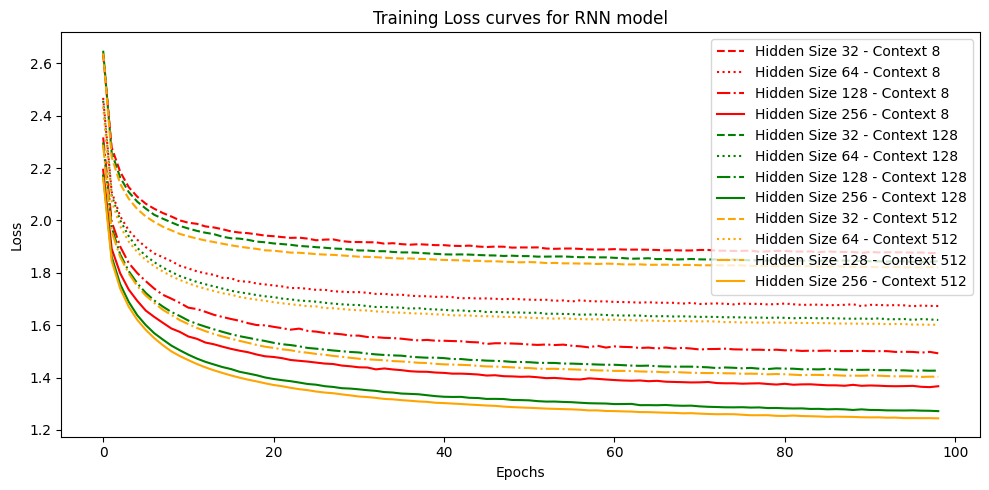

In [66]:
import matplotlib.pyplot as plt
import pickle

with open('loss_rnn_context32_hiddensize32.pkl', 'rb') as file:
    loss_rnn_context8_hiddensize32 = pickle.load(file)

with open('loss_rnn_context32_hiddensize64.pkl', 'rb') as file:
    loss_rnn_context8_hiddensize64 = pickle.load(file)

with open('loss_rnn_context32_hiddensize128.pkl', 'rb') as file:
    loss_rnn_context8_hiddensize128 = pickle.load(file)

with open('loss_rnn_context32_hiddensize256.pkl', 'rb') as file:
    loss_rnn_context8_hiddensize256 = pickle.load(file)
    
with open("loss_rnn_context128_hiddensize32.pkl", "rb") as file:
    loss_rnn_context128_hiddensize32 = pickle.load(file)

with open("loss_rnn_context128_hiddensize64.pkl", "rb") as file:
    loss_rnn_context128_hiddensize64 = pickle.load(file)

with open("loss_rnn_context128_hiddensize128.pkl", "rb") as file:
    loss_rnn_context128_hiddensize128 = pickle.load(file)

with open("loss_rnn_context128_hiddensize256.pkl", "rb") as file:
    loss_rnn_context128_hiddensize256 = pickle.load(file)

with open("loss_rnn_context512_hiddensize32.pkl", "rb") as file:
    loss_rnn_context512_hiddensize32 = pickle.load(file)

with open("loss_rnn_context512_hiddensize64.pkl", "rb") as file:
    loss_rnn_context512_hiddensize64 = pickle.load(file)

with open("loss_rnn_context512_hiddensize128.pkl", "rb") as file:
    loss_rnn_context512_hiddensize128 = pickle.load(file)

with open("loss_rnn_context512_hiddensize256.pkl", "rb") as file:
    loss_rnn_context512_hiddensize256 = pickle.load(file)

fig = plt.figure(figsize=(10, 5))
plt.plot(loss_rnn_context8_hiddensize32, label='Hidden Size 32 - Context 8', color='red', linestyle='dashed')
plt.plot(loss_rnn_context8_hiddensize64, label='Hidden Size 64 - Context 8',color='red', linestyle='dotted')
plt.plot(loss_rnn_context8_hiddensize128, label='Hidden Size 128 - Context 8',color='red', linestyle='dashdot')
plt.plot(loss_rnn_context8_hiddensize256, label='Hidden Size 256 - Context 8', color='red', linestyle='solid')
plt.plot(loss_rnn_context128_hiddensize32, label='Hidden Size 32 - Context 128', color='green', linestyle='dashed')
plt.plot(loss_rnn_context128_hiddensize64, label='Hidden Size 64 - Context 128', color='green', linestyle='dotted')
plt.plot(loss_rnn_context128_hiddensize128, label='Hidden Size 128 - Context 128', color='green', linestyle='dashdot')
plt.plot(loss_rnn_context128_hiddensize256, label='Hidden Size 256 - Context 128', color='green', linestyle='solid')
plt.plot(loss_rnn_context512_hiddensize32, label='Hidden Size 32 - Context 512', color='orange', linestyle='dashed')
plt.plot(loss_rnn_context512_hiddensize64, label='Hidden Size 64 - Context 512', color='orange', linestyle='dotted')
plt.plot(loss_rnn_context512_hiddensize128, label='Hidden Size 128 - Context 512', color='orange', linestyle='dashdot')
plt.plot(loss_rnn_context512_hiddensize256, label='Hidden Size 256 - Context 512', color='orange', linestyle='solid')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss curves for RNN model')
plt.legend()
plt.tight_layout()
plt.show()

You can see that the training loss improve when we see that if we fix the hidden size, the performance of the model improves when we increase the context length.  

However, the major reason of improvement is the increase in the hidden size. This is because as we increase the length of the "representation vectors" for each token, we allow the model to store more semantic information about the token into the hidden state. 

This in turn allow the model to store more different kinds of interactions between the tokens, and thus to learn more complex patterns.

At the end, the model with hidden size 256 and context length 512 is the best one, and achieves a training loss of about 1.2! 

### Let's load the model using the weights that I provided.
These weights have been obtained setting hidden size to 256 and context length to 512, and training for 100000 iterations. 

In [67]:
import torch
# Load state params
device = "cpu"
model = RNNLM(len(chars), hidden_size=256)
model.load_state_dict(torch.load("model_rnn_context512_hiddensize256.pt",map_location=torch.device('cpu')))
inputs_generate = torch.zeros((1,1), dtype=torch.long, device=device)
print(decode_char(model.generate(inputs_generate, max_new_tokens=100)[0].tolist()))



“A dream, “the fire. The Father commanded.

When the battlefs again, but I stay along the same, and the king merce he might seem. It was a heathered Symor Riverrun.

“What was what they stowers as she held and while down to the by solained bunchine. His prayers wives, and a fine placed his shoulder shadows and sharp in the monstom Ned told her. The fat best across their words. It seems her, with a hunt is his brother, Meris dead in battle. Sorrow’s a good scrabble, about very white,” Ser Loras Brandon turned out, circled me?”

Darry squyres open…





Beticker he was brown leaves to lose for himself. There is notched on his brothers for dark yet all the bleebale.”

The vigive, whether the Trident you between your sides, and good tinite who.”

The shadness of youth, half me, or I am a long. There are fear.” The Unspeal their door, Hot Pie, my lady Catelyn.”

Jon hugged at her own to the way in her boy look here?”

“Stanci off, soft and amongst, and we heard them know… but does he turn

We can see that the text is more coherent with the kind of text of the book!  
Still remember that this text is generated character by character, so the ability to build words is already very fascinating and impressive!

## Examples of exercises that you can do to further explore text generation

### Exercise 1:
Try to implement a word or sub-word based tokenization and train the model to predict words or sub words instaed of single characters. Then train it on the same book and try to generate some text. Compare it with the generation of the character based model.

### Exercise 2:
Try to implement a slightly more complicated network, a Gated Recurrent Unit (or GRU). This kind of network tries to solve the problem of RNN of not being able to store long term dependencies. Indeed in a GRU there are two hidden states, one that store the long term memory, and one that store the short term memory. The two states are combined using apposite "gates", and in this way the network can store long term dependencies when needed. Compare the performance with the RNN, both in terms of training loss curves and generation quality.